In [11]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import xarray as xa

## Single station

In [5]:
station = 11528700
climate_model = 'CanESM2'
hist_flow = np.load('projection_dataset/'+str(station)+'-'+climate_model+'-'+'hist.npy')
print(hist_flow.shape)
proj_flow = np.load('projection_dataset/'+str(station)+'-'+climate_model+'-'+'RCP8.5.npy')
print(proj_flow.shape)
proj_flow = proj_flow[:hist_flow.shape[0]]

(9133, 1)
(10593, 1)


In [12]:
hist_start = datetime(1980,12,31)
hist_date = [timedelta(days=i)+hist_start for i in range(9133)]
proj_start = datetime(2070,12,31)
proj_date = [timedelta(days=i)+proj_start for i in range(9133)]
print(hist_date[-1], ' ', hist_date[0])
print(proj_date[-1], ' ', proj_date[0])
hist = xa.DataArray(data=hist_flow.reshape(-1), 
                    dims={'time'},
                   coords={'time':hist_date})
proj = xa.DataArray(data=proj_flow.reshape(-1), 
                    dims={'time'},
                   coords={'time':proj_date})

2006-01-01 00:00:00   1980-12-31 00:00:00
2096-01-01 00:00:00   2070-12-31 00:00:00


In [37]:
hist_peak = []
proj_peak = []
hist_years = np.arange(1981, 2005)
proj_years = np.arange(2071, 2095)
for year in hist_years:
    start = datetime(year, 10, 1)
    end = datetime(year+1, 9, 30)
    water = hist.loc[start:end]
    # print(water.shape)
    x = water.where(water==water.max(), drop=True)['time'].values[0]
    ts = (x-np.datetime64('1970-01-01T00:00:00Z'))/np.timedelta64(1,'s')
    peak_date = datetime.utcfromtimestamp(ts)
    peak_delta = peak_date - start
    hist_peak.append(peak_delta.days)
for year in proj_years:
    start = datetime(year, 10, 1)
    end = datetime(year+1, 9, 30)
    water = proj.loc[start:end]
    # print(water.shape)
    x = water.where(water==water.max(), drop=True)['time'].values[0]
    ts = (x-np.datetime64('1970-01-01T00:00:00Z'))/np.timedelta64(1,'s')
    peak_date = datetime.utcfromtimestamp(ts)
    peak_delta = peak_date - start
    proj_peak.append(peak_delta.days)

/tempest/duan0000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  # This is added back by InteractiveShellApp.init_path()
/tempest/duan0000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  # This is added back by InteractiveShellApp.init_path()
/tempest/duan0000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  # This is added back by InteractiveShellApp.init_path()
/tempest/duan0000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  # This is added back by InteractiveShellApp.init_path()
/tempest/dua

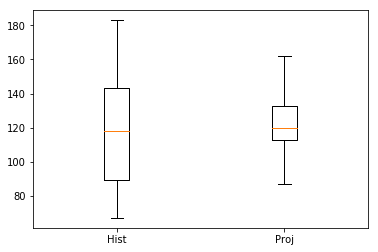

In [53]:
days = {'Hist': hist_peak, 'Proj': proj_peak}
fig, axs = plt.subplots()
axs.boxplot(days.values())
axs.set_xticklabels(days.keys())
plt.show()

## multiple

* general function

In [61]:
def days(station, climate_model):
    hist_flow = np.load('projection_dataset/'+str(station)+'-'+climate_model+'-'+'hist.npy')
    
    proj_flow = np.load('projection_dataset/'+str(station)+'-'+climate_model+'-'+'RCP8.5.npy')
    
    proj_flow = proj_flow[:hist_flow.shape[0]]
    hist_start = datetime(1980,12,31)
    hist_date = [timedelta(days=i)+hist_start for i in range(9133)]
    proj_start = datetime(2070,12,31)
    proj_date = [timedelta(days=i)+proj_start for i in range(9133)]
    
    hist = xa.DataArray(data=hist_flow.reshape(-1), 
                        dims={'time'},
                       coords={'time':hist_date})
    proj = xa.DataArray(data=proj_flow.reshape(-1), 
                        dims={'time'},
                       coords={'time':proj_date})
    hist_peak = []
    proj_peak = []
    hist_years = np.arange(1981, 2005)
    proj_years = np.arange(2071, 2095)
    for year in hist_years:
        start = datetime(year, 10, 1)
        end = datetime(year+1, 9, 30)
        water = hist.loc[start:end]
        # print(water.shape)
        x = water.where(water==water.max(), drop=True)['time'].values[0]
        ts = (x-np.datetime64('1970-01-01T00:00:00Z'))/np.timedelta64(1,'s')
        peak_date = datetime.utcfromtimestamp(ts)
        peak_delta = peak_date - start
        hist_peak.append(peak_delta.days)
    for year in proj_years:
        start = datetime(year, 10, 1)
        end = datetime(year+1, 9, 30)
        water = proj.loc[start:end]
        # print(water.shape)
        x = water.where(water==water.max(), drop=True)['time'].values[0]
        ts = (x-np.datetime64('1970-01-01T00:00:00Z'))/np.timedelta64(1,'s')
        peak_date = datetime.utcfromtimestamp(ts)
        peak_delta = peak_date - start
        proj_peak.append(peak_delta.days)
    days = {'Hist': hist_peak, 'Proj': proj_peak}
    return days

In [72]:
SMALL_SIZE=8; MEDIUM_SIZE=14; BIGGER_SIZE=18
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

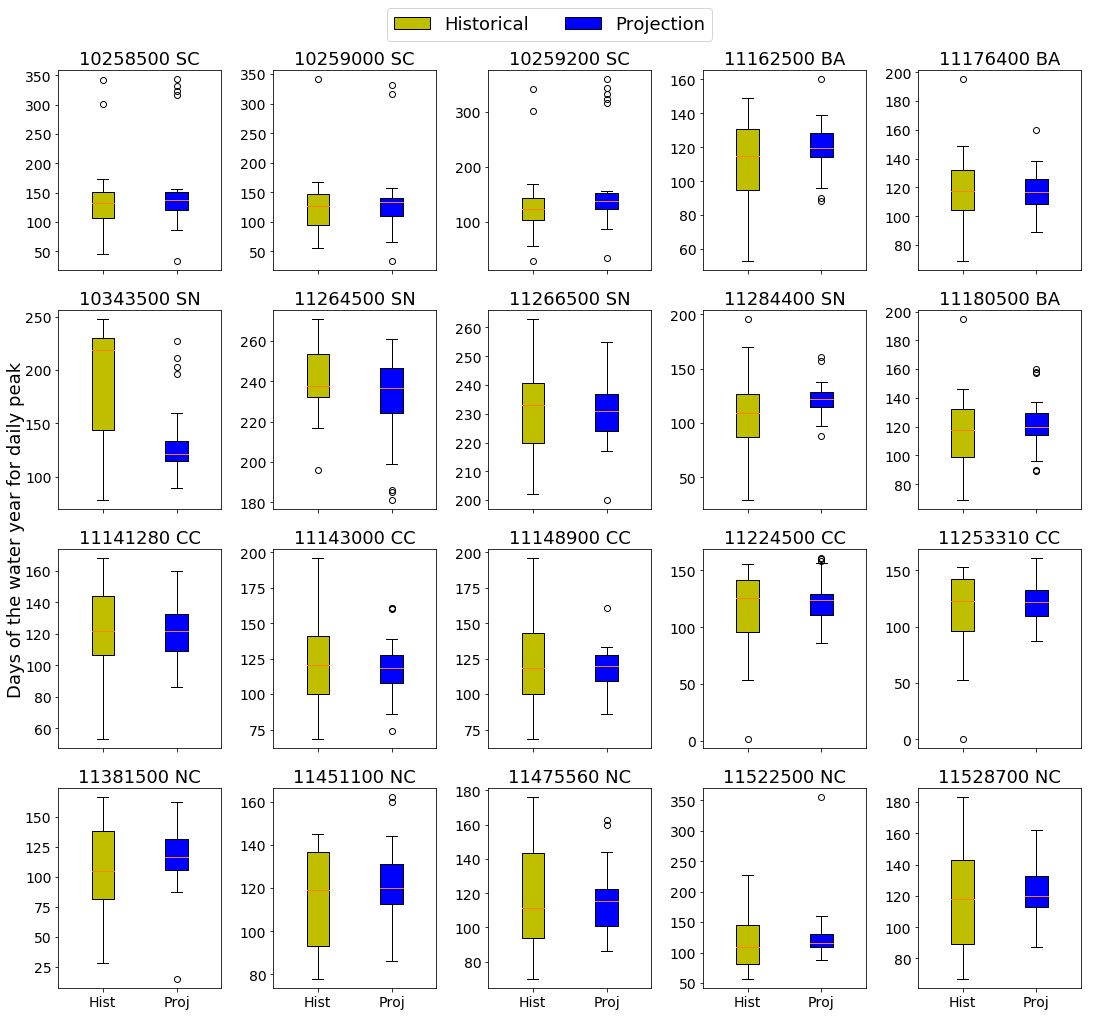

In [82]:
import warnings
warnings.filterwarnings('ignore')
station_dict = {'10258500':'SC', '10259000':'SC', '10259200':'SC', '10343500':'SN', '11141280':'CC', 
                '11143000':'CC', '11148900':'CC', '11162500':'BA', '11176400':'BA', '11180500':'BA', 
                '11224500':'CC', '11253310':'CC', '11264500':'SN', '11266500':'SN', '11284400':'SN', 
                '11381500':'NC', '11451100':'NC', '11475560':'NC', '11522500':'NC', '11528700':'NC'}
order_stations=[10258500, 10259000, 10259200, 11162500, 11176400,
                10343500, 11264500, 11266500, 11284400, 11180500,
                11141280, 11143000, 11148900, 11224500, 11253310, 
                11381500, 11451100, 11475560, 11522500, 11528700]
fig, axs = plt.subplots(4,5, figsize=(16,15), sharex=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Days of the water year for daily peak")
for i in range(20):
    station = order_stations[i]
    peak_days = days(station, climate_model)
    # axs.flat[i].boxplot(peak_days.values(), patch_artist=True, boxprops=dict(facecolor="y"))
    bp1 = axs.flat[i].boxplot(peak_days['Hist'], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = axs.flat[i].boxplot(peak_days['Proj'], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
    axs.flat[i].set_title(str(station)+' '+station_dict[str(station)])
    axs.flat[i].set_xlim([-0.3, 0.8])
    axs.flat[i].set_xticks([0,0.5])
    axs.flat[i].set_xticklabels(['Hist', 'Proj'])
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0]],
                 ['Historical', 'Projection'], ncol=2, loc='upper center')
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('CanESM2-peak.eps')

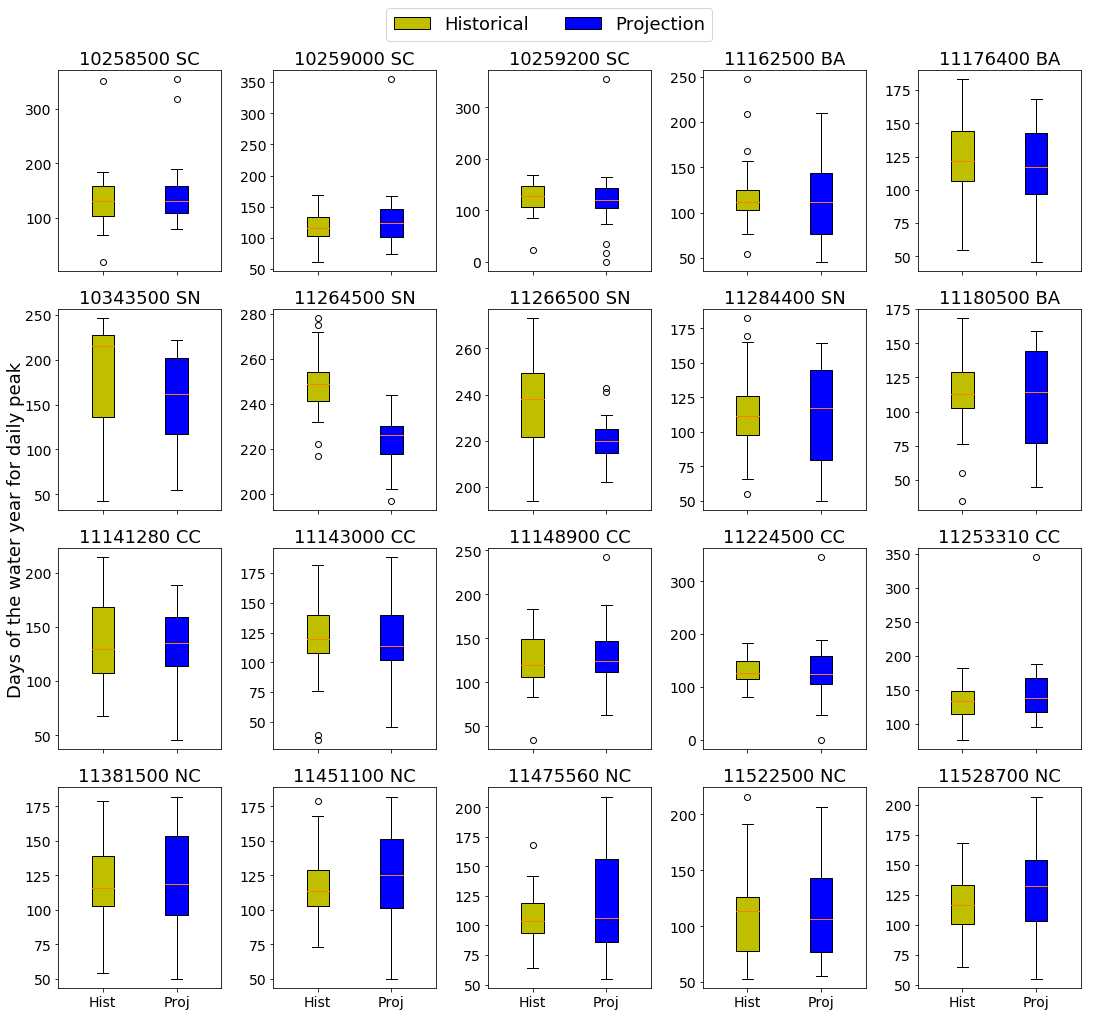

In [83]:
fig, axs = plt.subplots(4,5, figsize=(16,15), sharex=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Days of the water year for daily peak")
for i in range(20):
    station = order_stations[i]
    peak_days = days(station, 'MIROC5')
    bp1 = axs.flat[i].boxplot(peak_days['Hist'], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = axs.flat[i].boxplot(peak_days['Proj'], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
    axs.flat[i].set_title(str(station)+' '+station_dict[str(station)])
    axs.flat[i].set_xlim([-0.3, 0.8])
    axs.flat[i].set_xticks([0,0.5])
    axs.flat[i].set_xticklabels(['Hist', 'Proj'])
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0]],
                 ['Historical', 'Projection'], ncol=2, loc='upper center')
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('MIROC5-peak.eps')

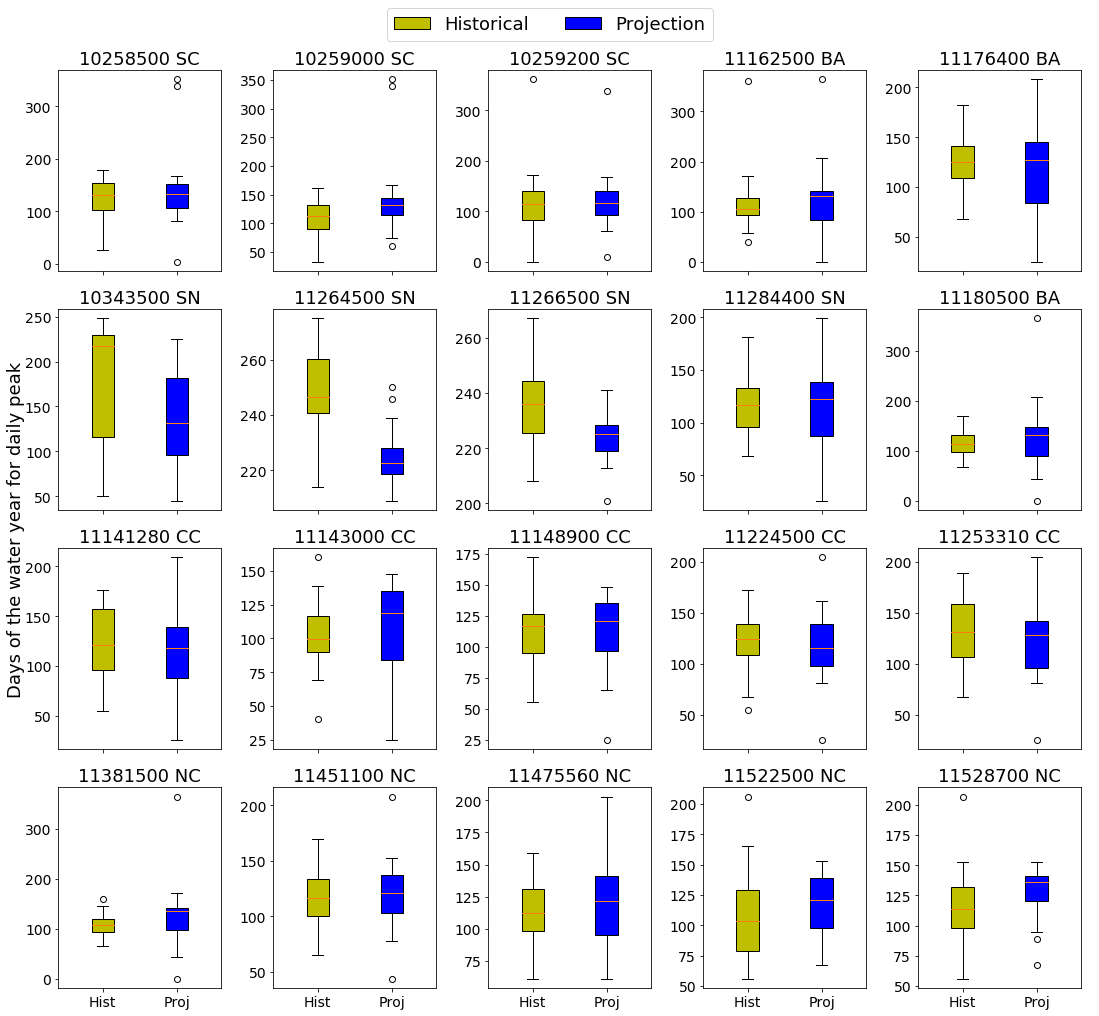

In [84]:
fig, axs = plt.subplots(4,5, figsize=(16,15), sharex=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Days of the water year for daily peak")
for i in range(20):
    station = order_stations[i]
    peak_days = days(station, 'HadGEM2ES')
    bp1 = axs.flat[i].boxplot(peak_days['Hist'], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = axs.flat[i].boxplot(peak_days['Proj'], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
    axs.flat[i].set_title(str(station)+' '+station_dict[str(station)])
    axs.flat[i].set_xlim([-0.3, 0.8])
    axs.flat[i].set_xticks([0,0.5])
    axs.flat[i].set_xticklabels(['Hist', 'Proj'])
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0]],
                 ['Historical', 'Projection'], ncol=2, loc='upper center')
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('HadGEM2ES-peak.eps')

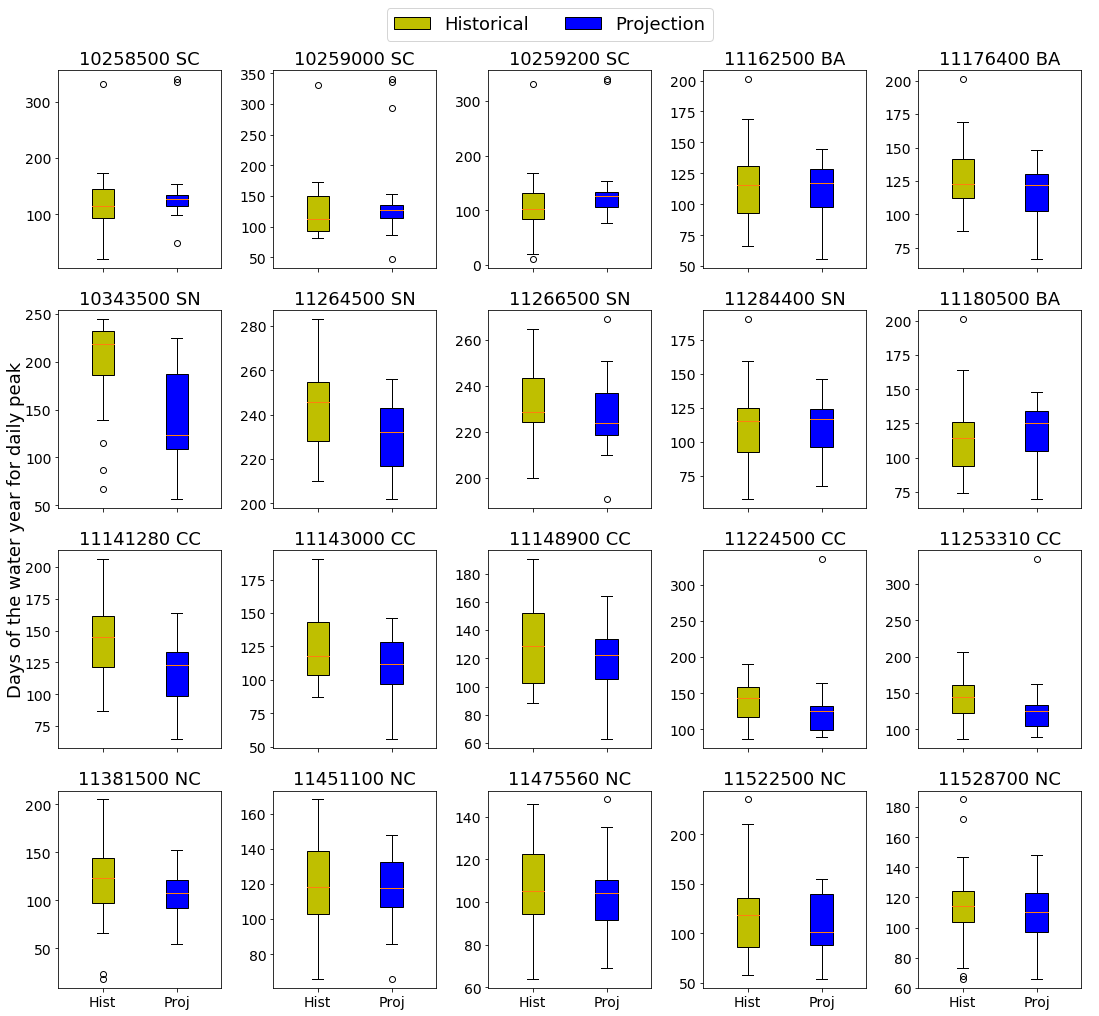

In [85]:
fig, axs = plt.subplots(4,5, figsize=(16,15), sharex=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Days of the water year for daily peak")
for i in range(20):
    station = order_stations[i]
    peak_days = days(station, 'CNRMCM5')
    bp1 = axs.flat[i].boxplot(peak_days['Hist'], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = axs.flat[i].boxplot(peak_days['Proj'], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
    axs.flat[i].set_title(str(station)+' '+station_dict[str(station)])
    axs.flat[i].set_xlim([-0.3, 0.8])
    axs.flat[i].set_xticks([0,0.5])
    axs.flat[i].set_xticklabels(['Hist', 'Proj'])
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0]],
                 ['Historical', 'Projection'], ncol=2, loc='upper center')
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('CNRMCM5-peak.eps')